# Entropy!

v1.0 (2018 Spring) Tavor Baharav, Kaylee Burns, Gary Cheng, Sinho Chewi, Hemang Jangle, William Gan, Alvin Kao, Chen Meng, Vrettos Muolos, Kanaad Parvate, Ray Ramamurti

## Self-Grades: https://docs.google.com/forms/d/e/1FAIpQLSfpFd7kWq0khSvoCfTCTCPlyjXJp0R-pyRzaTvCSu2ATh1Nkg/viewform?usp=sf_link

## <font color = blue>$\mathcal{Q}$1. Huffman Codes.</font>

Ben Bitdiddle is an avid coinflipper. He and his friend Alice enjoy sending each other the results of their coinflipping escapades, but unfortunately, they have a very minimal data plan. In order to get around this, Ben decides to try and $\textit{compress}$ the sequence of coinflips he wants to communicate to Alice before sending it. He settles on his favorite method, Huffman Coding. He solidifies his scheme as follows:
1. Flip a coin with heads (1) bias $p$ and record its value $M$ times.
2. Encode and send the sequence as a binary string using a Huffman code based on the coin flip frequencies determined by the hash table probDict you will generate. He's not sure how many coin flips he wants to group together as a single encoding symbol, so he leaves that as a variable $n$ for now.

Before attempting this section, brush up on (or learn for the first time) <a href="https://www.siggraph.org/education/materials/HyperGraph/video/mpeg/mpegfaq/huffman_tutorial.html">Huffman coding</a>.


### <font color=blue>a. Implement a method generateProbabilities that, given $n,p$, outputs a dictionary mapping sequences of $n$ coinflips to their associated probabilities. </font>

In [8]:
import numpy as np
import scipy.stats
import scipy
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [9]:
plt.style.use('dark_background')

In [10]:
def generateProbabilities(p,n):
    """Return a dictionary (probDict) which maps all 2**n possible sequences of n coin flips to their
        probability, given a heads (1) bias of p"""
    
    probDict = {}

    for i in range(2**n):
        binString = bin(i)[2:]
        binString = '0' * (n - len(binString)) + binString
        prob = 1
        prob*=  1 if binString.count('0') == 0 else (1-p)**binString.count('0')
        prob*=  1 if binString.count('1') == 0 else p**binString.count('1')

        probDict[binString] = prob

    return probDict

### <font color=blue>b. Implement a method HuffEncode that, given a list of frequencies, will output the corresponding mapping of input symbol to Huffman codewords. Write a subsequent method encode_string that encodes a string given $n$ and the huffman dictionary.</font>

In [11]:
from heapq import heappush, heappop, heapify
from collections import defaultdict

def HuffEncode(freq_dict):
    """Return a dictionary (symbols2huff) which maps keys from the input dictionary freq_dict
       to bitstrings using a Huffman code based on the frequencies of each key"""
    freqToLetters = []
    huffMapSoFar = dict()
    for key in freq_dict:
        heappush(freqToLetters, ((freq_dict[key]), [key]))
        huffMapSoFar[key]= ""
    # Your Beautiful Code Here #
    while len(freqToLetters) > 1:
        smallest = heappop(freqToLetters)
        secsmallest = heappop(freqToLetters)
        combined = (smallest[0] + secsmallest[0], smallest[1] + secsmallest[1])
        for symbol in smallest[1]:
            huffMapSoFar[symbol] = "0" + huffMapSoFar[symbol]
        for symbol in secsmallest[1]:
            huffMapSoFar[symbol] = "1" + huffMapSoFar[symbol]
        heappush(freqToLetters, combined)
    return huffMapSoFar
        

def encode_string(string, flip2huff,n):
    """Return a bitstring encoded according to the Huffman code defined in the dictionary letters2huff.
    We assume the length of string divides n"""
    
    # Your Beautiful Code Here    
    coded_bit_string = ''
    for i in range(len(string)//n):
        coded_bit_string += flip2huff[string[n*i:n*(i+1)]]
    return coded_bit_string


entropy = lambda x : -x*np.log2(x) - (1-x)*np.log2(1-x)

### <font color=blue>c. Plot Generation</font>
Ben isn't sure what value of $n$ to pick, so he decides to test his compression scheme using different values of $n$.

Using the functions you wrote above, lets run some simulations! In order to find the best $n$, plot $n$ on your x axis, and fraction of bits we need to use $\left( \frac{\text{Compressed Length}}{\text{Uncompressed length}} \right)$ on the y axis. For each setting, average over 100 trials to reduce noise. Generate plots for p = .5,.75,.97 (3 total plots). For each plot, use:

$n = 1,2,...,15$

$M = 1000$ (be careful of truncation errors, e.g. for n=3, use 1002).



In [12]:
### Your beautiful simulation code here

p_list = [0.5, 0.75, .97] #coin '1' bias
nVals = range(1,15) #encode n coin flips

numFlips = 1000
numTrials = 100

averageCompression = [[], [], []]

for i in range(len(p_list)):
    p = p_list[i]
    for n in nVals:
        probDict = generateProbabilities(p,n)

        flip2huff = HuffEncode(probDict)

        numFlipsP = ((numFlips-1)//n + 1) * n # to prevent truncation in the encoding
        sum_length = 0
        for _ in range(numTrials):
            ### your code here
            string = "".join(str(k) for k in scipy.stats.bernoulli.rvs(p, size = numFlipsP))
            sum_length += len(encode_string(string, flip2huff, n))
        averageCompression[i].append(1.0*sum_length/(numTrials*numFlipsP))

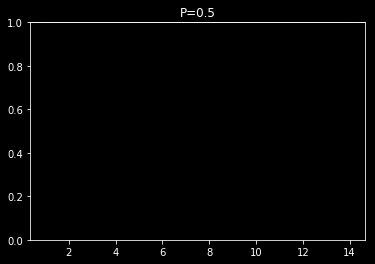

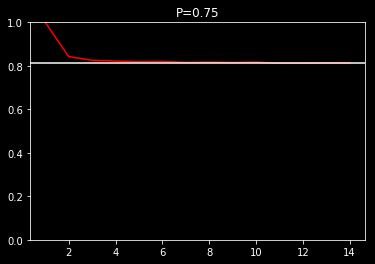

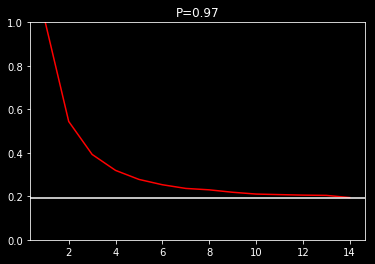

In [13]:
for i in range(len(p_list)):
    p = p_list[i]
    plt.figure()
    plt.plot(nVals, averageCompression[i], c = 'r')
    plt.title("P=" + str(p))
    plt.ylim([0,1])
    plt.axhline(y=entropy(p))

Ben shows this graph to Alice, surprised that his compression ratio keeps improving as he increases $n$, and seems to be asymptoting. Alice tells him of course, and that there exists an information theoretic lower bound.
### <font color=blue>d. Find the relevant information theoretic lower bound, and add it as a horizontal line to your 3 plots above.</font>

### <font color=red>Solution: </font>

Percent bits needed to represent a bit string losslessly is lower bounded by the normalized entropy of the sequence. Formally:

$$\frac{1}{M}H(X^M) = \frac{1}{M} (M\cdot H(X)) = H(\text{Bern}(p)) = H(p)$$

Thus, any compression scheme we deploy will use at least $H(p)$ compressed bits per bit of uncompressed data.

"Wow, this is great!" Ben exclaims. He suggests continuing to increase $n$, to keep improving the compression ratio. Alice tells him that there's a serious problem with this.

### <font color=blue>e. What issue arises as $n$ becomes large?</font>

### <font color=red>Solution:</font>

The number of leaves in the huffman tree grows exponentially in n ($2^n$). Generating the encoding table becomes infeasible for large $n$. 

## <font color = blue>$\mathcal{Q}$2. Typical Sets.</font>
We will now explore the notion of $\textit{Typical Sets}$, as covered in the homework. This will help solidify your understanding of entropy, and your understanding of Shannon's theorem. As you recall from the homework, $\textit{Typical Sets}$ includes all the events with a probability within the range of ($2^{-n(H(p) + \epsilon)}$, $2^{-n(H(p) - \epsilon)}$).

### <font color = blue> a. Plotting</font>
For $p=.6$, $n=10,...,500$, determine which elements would appear in the typical set $A_\epsilon^{(n)}$, for $\epsilon = .02$. Generate 3 plots with $n$ on the x axis, one with the probability of the typical set $P(A_\epsilon^{(n)})$ on the y axis, another with $\frac{1}{n} \log_2 |A_\epsilon^{(n)}|$, and a third with the fraction of events in the typical set $\frac{A_\epsilon^{(n)}}{2^n}$.

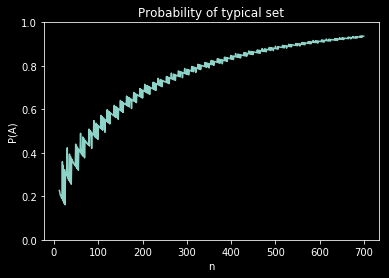

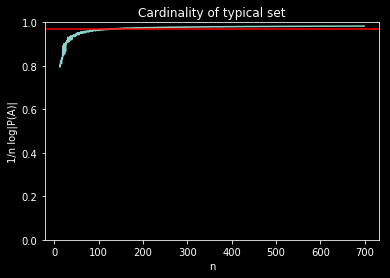

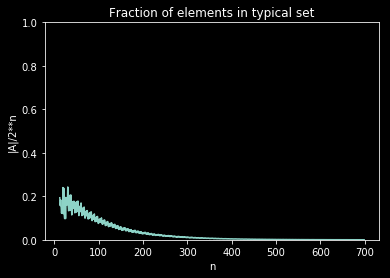

In [14]:
# Actual typical set

p=.6
probArr = []
cardArr = []
pctUsed = []
nRange = range(12,700)
eps = .02
for n in nRange:
    runningProb = 0
    numUsed = 0
    minProb = 2**(-n*(entropy(p)+eps))
    maxProb = 2**(-n*(entropy(p)-eps))
    for i in range(n,-1,-1):
        prob = p**(i)*(1-p)**(n-i)
        if not(prob > minProb and prob < maxProb):
            continue
        numEvents = scipy.special.comb(n,i,exact=True)
        
        runningProb += prob*numEvents
        numUsed += numEvents
    probArr.append(runningProb)
    cardArr.append(np.log2(1.0*numUsed)/n)
    pctUsed.append(1.0*numUsed/2**n)

plt.figure()
plt.plot(nRange,probArr)
# plt.axhline(entropy(p),c = 'r')
plt.xlabel('n')
plt.ylim([0,1])
_ = plt.ylabel('P(A)')
_ = plt.title("Probability of typical set")


plt.figure()
plt.plot(nRange, cardArr)
plt.axhline(entropy(p),c = 'r')
# plt.axhline(entropy(p)+eps,c = 'r', ls = 'dashed')
plt.ylim([0,1])
plt.xlabel('n')
_ = plt.ylabel('1/n log|P(A)|')
_ = plt.title("Cardinality of typical set")

plt.figure()
plt.plot(nRange, pctUsed)
plt.ylim([0,1])
plt.xlabel('n')
_ = plt.ylabel('|A|/2**n')
_ = plt.title("Fraction of elements in typical set")

One way of thinking about the typical set asymptotically is that our compression function simply indexes each element in the typical set, numbering them $1,2,...,2^{nH(p)}$ ($nH(p)$ bits). All sequences outside of this typical set, we leave encoded as they are (n bits). If we look at the expected number of bits required to represent an symbol drawn according to the underlying distribution, we get

$$\begin{align}
\mathbb{E} [\text{len}(x)] 
&= P(x \in A_\epsilon^{(n)}) \cdot \mathbb{E} [\text{len}(x) | x \in A_\epsilon^{(n)}] + P(x \notin A_\epsilon^{(n)}) \cdot \mathbb{E} [\text{len}(x) | x \notin A_\epsilon^{(n)}]\\
&= P(x \in A_\epsilon^{(n)}) \cdot nH(p) + P(x \notin A_\epsilon^{(n)}) \cdot n\\
& \hspace{-.2cm} \overset{n \rightarrow \infty}{=} 1 \cdot n H(p) + 0 \cdot n\\
&= nH(p)
\end{align}$$

### <font color = blue> b. Observations</font>

Describe the asymptotic behavior of your 3 graphs.

#### <font color = red> Solution:</font>
    
The probability of the typical set quickly approaches 1.

$\frac{1}{n} \log_2 |A_\epsilon^{(n)}| \rightarrow H(p)$, as $|A_\epsilon^{(n)}| \rightarrow 2^{nH(p)}$.

The fraction of elements in the typical set goes to 0, as $\frac{|A_\epsilon^{(n)}|}{2^n} \rightarrow 2^{n(H(p)-1)} \rightarrow 0$.

## Q3) Entropy and Information Content

In the previous questions, we saw entropy being used as a limit for the extent we can compress a source of data. Now, we will explore an alternative interpretation of entropy as the amount of information contained in a random source.

### Consider the following problem; we have 8 bins, numbered 1 through 8. There is a prize in exactly one of the bins, and each bin is equally likely to contain the prize. We'd like to figure out what which bin contains the prize, but we can only ask questions of the form "Is the bin number in $S$?" for some $S \subseteq \{1,2,3,4,5,6,7,8\}$.

### <font color = blue> a) With an optimal strategy, what is the expected number of questions we would need to ask, assuming that we get feedback after every question? Describe the sequence of questions we would ask, depending on what feedback we get.

Using binary search, we can design an optimal strategy that always requires three questions. One choice of questions is as follows:

In [ ]:
query S = {1,2,3,4}
if yes:
    query S = {1,2}
    if yes
        query S = {1}
    else
        query S = {3}
else:
    query S = {5,6}
    if yes
        query S = {5}
    else
        query S = {7}

### <font color = blue> b) Let $X$ be a random variable for the number of the bin containing the ball. What is the entropy of $X$? (Use a logarithm of base 2.) How does this compare to the expected number of questions we asked?

$H(X) = \sum_{i=1}^{8} \frac{1}{8} \log_{2}(8) = \sum_{i=1}^{8} \frac{3}{8} = 3$. This is equal to the number of questions we asked. In this case, we can interpret each question as giving us an additional bit of information.

### <font color = blue> c) Now consider the case where we have prior probabilities on how likely each bin is to contain the prize. Describe how we could use Huffman coding to find an efficient series of questions to ask, in order to figure out which bin contains the prize. (In fact, one can show that using Huffman coding helps you determine the optimal sequence of questions to ask.)

Any strategy that we come up with consists of a series of yes-no questions that help us uniquely determine which bin contains the prize. If we encode a "yes" answer with a 1 and a "no" answer with a 0, then we can use this to draw out an encoding tree and associate each bin with a different bit string. This process defines a bijection between the set of strategies and the set of encoding trees.

Furthermore, we see that the expected number of questions we have to ask is equal to the expected length of a codeword in the corresponding code. Therefore, if we generate a Huffman tree using the probabilities for each bin, we can recover an optimal strategy.

### <font color = blue> d) Let's look at a specific instance of this problem, where the bins have probabilities [0.4, 0.15, 0.12, 0.11, 0.07, 0.06, 0.05, 0.04] of containing the prize. Use your method HuffEncode from the previous question to calculate the expected number of questions you have to ask in order to determine which bin contains the prize, using this approach.

After building the Huffman tree, we calculate the expected number of questions asked to be $0.4(1) + 0.15(3) + 0.12(3) + 0.11(4) + 0.07(4) + 0.06(4) + 0.05(5) + 0.04(5) = 2.62$.

### <font color = blue> e) Repeat part b) for this new scenario, and compare your answer to the answer you obtained in the previous part.

In [12]:
def calculate_entropy(freq):
    logfreq = np.log(freq) / np.log(2)
    return -1 * sum(freq * logfreq)

calculate_entropy([0.4, 0.15, 0.12, 0.11, 0.07, 0.06, 0.05, 0.04])

2.5706093850101905

### <font color = blue> f) Try a few more distributions, and compare the expected number of questions you need to ask with Huffman Coding to the entropy of the distribution, $H(X)$. Provide observed bounds for expected number of question with respect to $H(X)$.

#### <font color = red> Solution: </font>
    
The expected number of questions is in between H(X) and H(X) + 1. This characterized a huffman code as an "optimal code".